<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Supervised Machine Learning: Regression - Final Assignment</font></h1>


## Instructions:

In this Assignment, you will demonstrate the data regression skills you have learned by completing this course. You are expected to leverage a wide variety of tools, but also this report should focus on present findings, insights, and next steps. You may include some visuals from your code output, but this report is intended as a summary of your findings, not as a code review. 

The grading will center around 5 main points:

1. Does the report include a section describing the data?
2. Does the report include a paragraph detailing the main objective(s) of this analysis? 
3. Does the report include a section with variations of linear regression models and specifies which one is the model that best suits the main objective(s) of this analysis.
4. Does the report include a clear and well-presented section with key findings related to the main objective(s) of the analysis?
5. Does the report highlight possible flaws in the model and a plan of action to revisit this analysis with additional data or different predictive modeling techniques? 




## Import the required libraries


The following required modules are pre-installed in the Skills Network Labs environment. However if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda) you will need to install these libraries by removing the `#` sign before `!mamba` in the code cell below.


In [1]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt


## Importing the Dataset


Before you begin, you will need to choose a data set that you feel passionate about. You can brainstorm with your peers about great public data sets using the discussion board in this module.


Read your chosen dataset into pandas dataframe:


In [3]:
data = pd.read_csv('winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Once you have selected a data set, you will produce the deliverables listed below and submit them to one of your peers for review. Treat this exercise as an opportunity to produce analysis that are ready to highlight your analytical skills for a senior audience, for example, the Chief Data Officer, or the Head of Analytics at your company.
Sections required in your report:

*   Main objective of the analysis that specifies whether your model will be focused on prediction or interpretation.
*   Brief description of the data set you chose and a summary of its attributes.
*   Brief summary of data exploration and actions taken for data cleaning and feature engineering.
*   Summary of training at least three linear regression models which should be variations that cover using a simple  linear regression as a baseline, adding polynomial effects, and using a regularization regression. Preferably, all use the same training and test splits, or the same cross-validation method.
*  A paragraph explaining which of your regressions you recommend as a final model that best fits your needs in terms of accuracy and explainability.
*  Summary Key Findings and Insights, which walks your reader through the main drivers of your model and insights from your data derived from your linear regression model.
*  Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model adding specific data features to achieve a better explanation or a better prediction.


# 1. About the Data


The dataset specifies red wines by 12 metrics, one of which is quality.

In this assignment we'll be training to predict the quality given 11 metrics.
For data cleaning and handling, we'll be dividing quality by 10 to make it in the range 0-1 to work on it easier. And drop the parts with very small standard deviation so that our model focuses on more important parameters.

We'll be dividing it into Training (80%) and Test (20%) parts.


In [4]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


We can see that density makes almost no difference as it ranges from 0.99 to 1.00 with a standard deviation of 0.001.

Let's visualize our findings.

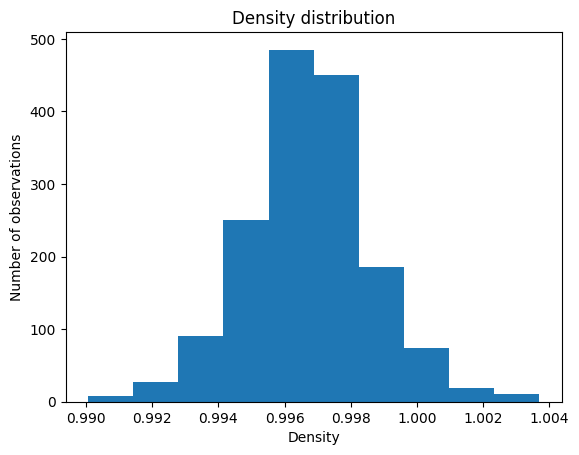

In [5]:
plt.hist(data['density'])
plt.xlabel('Density')
plt.ylabel('Number of observations')
plt.title('Density distribution')
plt.show()

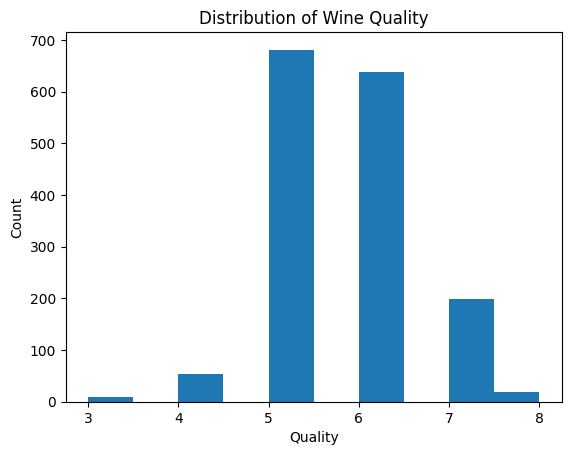

In [6]:
plt.hist(data['quality'])
plt.xlabel('Quality')
plt.ylabel('Count')
plt.title('Distribution of Wine Quality')
plt.show()

## Data Cleaning and Feature Extraction

Let's drop the 'density' column as we saw how it didn't make much difference.

In [7]:
cleaned_data = data.drop('density', axis=1)
cleaned_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4,5


Since we'll be predicting on quality let's divide it by 10 to keep it in the range 0-1, which would make it easier to work.

In [8]:
cleaned_data['quality'] = cleaned_data['quality']/10

print("After simplifying the quality column")
data.head()

After simplifying the quality column


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Split the data into training and test sets:

In [9]:
# Split the data into training and testing sets
X = cleaned_data.drop('quality', axis=1)
y = cleaned_data['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Objectives


The objective of this project is to build a model that successfully predicts the quality of a wine based on given parameters. The dataset used in this project contains various attributes of red wines, such as fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, and quality. The quality of the wine is the target variable that we aim to predict. By training and evaluating different regression models, including linear regression, polynomial regression, and ridge regression, we can determine the model that best fits the data and provides accurate predictions. The main goal is to develop a model that achieves high accuracy in predicting the quality of wines, which can be valuable for wine producers and enthusiasts in assessing and improving the quality of their products.

# 3. Linear Regression Models


### Linear Regression

In [10]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)


Mean Squared Error: 0.003905576238507956


### LR with Polynomial Features

Degree = 2

In [11]:
mse_poly =  []

# Create polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)

# Fit a linear regression model on the transformed data
poly_model = LinearRegression()
poly_model.fit(X_poly, y_train)

# Transform the test data
X_poly_test = poly.transform(X_test)

# Make predictions on the test set
y_pred_poly = poly_model.predict(X_poly_test)

# Evaluate the model
mse_poly.append(mean_squared_error(y_test, y_pred_poly))
print('Mean Squared Error (Polynomial Regression):', mse_poly[0])


Mean Squared Error (Polynomial Regression): 0.003873061528640885


Degree = 3

In [12]:
# Create polynomial features
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X_train)

# Fit a linear regression model on the transformed data
poly_model = LinearRegression()
poly_model.fit(X_poly, y_train)

# Transform the test data
X_poly_test = poly.transform(X_test)

# Make predictions on the test set
y_pred_poly = poly_model.predict(X_poly_test)

# Evaluate the model
mse_poly.append(mean_squared_error(y_test, y_pred_poly))
print('Mean Squared Error (Polynomial Regression):', mse_poly[1])


Mean Squared Error (Polynomial Regression): 0.0067683072849022445


### LR With Regularization (Ridge)

Alpha = 0.5

In [13]:
mse_ridge = []

ridge = Ridge(alpha=0.5)
ridge.fit(X_train, y_train)

y_pred_ridge = ridge.predict(X_test)
mse_ridge.append(mean_squared_error(y_test, y_pred_ridge))
print('Mean Squared Error (Ridge Regression):', mse_ridge[0])

Mean Squared Error (Ridge Regression): 0.003917775865042954


Alpha = 1

In [14]:
ridge = Ridge(alpha=1)
ridge.fit(X_train, y_train)

y_pred_ridge = ridge.predict(X_test)
mse_ridge.append(mean_squared_error(y_test, y_pred_ridge))
print('Mean Squared Error (Ridge Regression):', mse_ridge[1])

Mean Squared Error (Ridge Regression): 0.003929495854137186


Alpha = 3

In [15]:
ridge = Ridge(alpha=3)
ridge.fit(X_train, y_train)

y_pred_ridge = ridge.predict(X_test)
mse_ridge.append(mean_squared_error(y_test, y_pred_ridge))
print('Mean Squared Error (Ridge Regression):', mse_ridge[2])

Mean Squared Error (Ridge Regression): 0.0039684621374476954


# 4. Insights and key findings


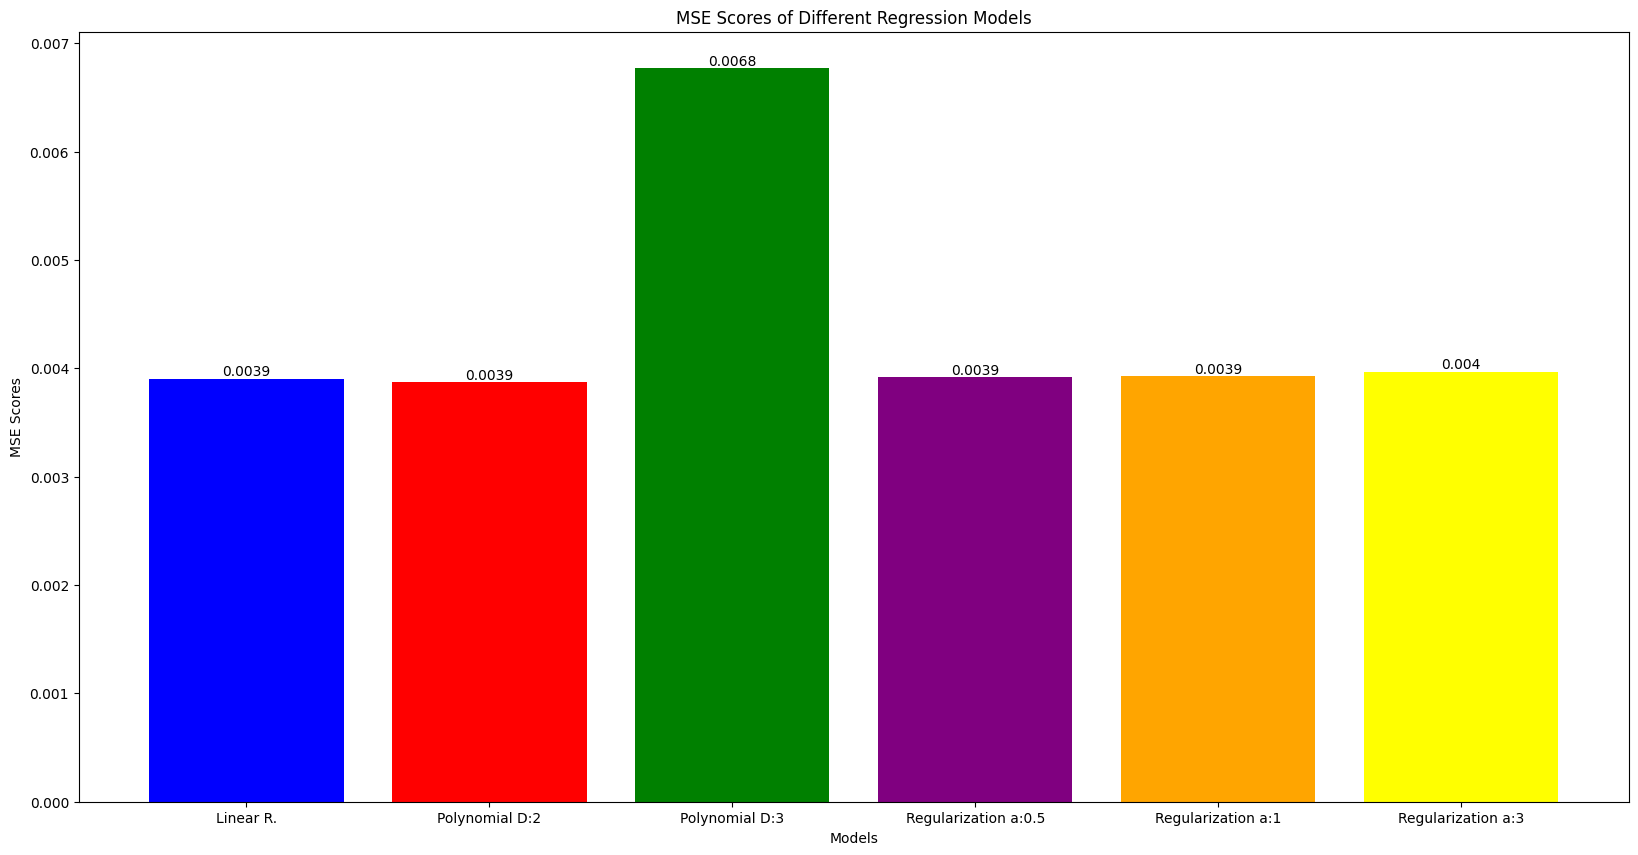

In [16]:
fig, bar_graph = plt.subplots(figsize=(20, 10))
models = ['Linear R.', 'Polynomial D:2', 'Polynomial D:3', 'Regularization a:0.5', 'Regularization a:1', 'Regularization a:3']
mse_scores = [mse, mse_poly[0], mse_poly[1], mse_ridge[0], mse_ridge[1], mse_ridge[2]]

bar_graph.bar(models, mse_scores, color=['blue', 'red', 'green', 'purple', 'orange', 'yellow', 'pink'])
bar_graph.set_xlabel('Models')
bar_graph.set_ylabel('MSE Scores')
bar_graph.set_title('MSE Scores of Different Regression Models')

# Add scores as integers on top of the bars
for i, score in enumerate(mse_scores):
    bar_graph.annotate(str(round(score, 4)), xy=(i, score), ha='center', va='bottom')

plt.show()


### Evaluation of our results

We've seen that the MSE results are:

* Basic Linear Regression Model, 0.0039
* LR with Polynomial Regression (Degree: 2, 3 respectively): 0.0038, 0.0067
* LR with Regularization (Alpha: 0.5, 1, 3 respectively): 0.00391, 0.00392, 0.00396 

We can conclude that the error trend is upwards as the Degree and Alpha parameteres increase and also we can observe a small drop in our error from the basic LR model to Polynomial Regression which means we've found the sweet spot at LR with Polynomial Regression Degree = 2.

We can confidently conclude that our model has successfully achieved its objectives.

### The Most Suitable Model for the Dataset is the basic Polynomial Regression Model with Degree:2. However Linear R. and all three regularization models were close.

# 5. Next Steps


To improve our prediction model, we can consider the following steps. First, we can explore and analyze the data further to identify any additional relevant features that may contribute to the prediction accuracy. Next, we can experiment with different regression algorithms and hyperparameter tuning to find the best model that fits our data. Additionally, we can apply feature engineering techniques such as scaling, normalization, or creating interaction terms to enhance the predictive power of our model. Furthermore, we can evaluate the model's performance using appropriate evaluation metrics and cross-validation techniques to ensure its robustness. Finally, we can consider ensemble methods such as random forests or gradient boosting to combine multiple models and improve the overall prediction accuracy.

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
